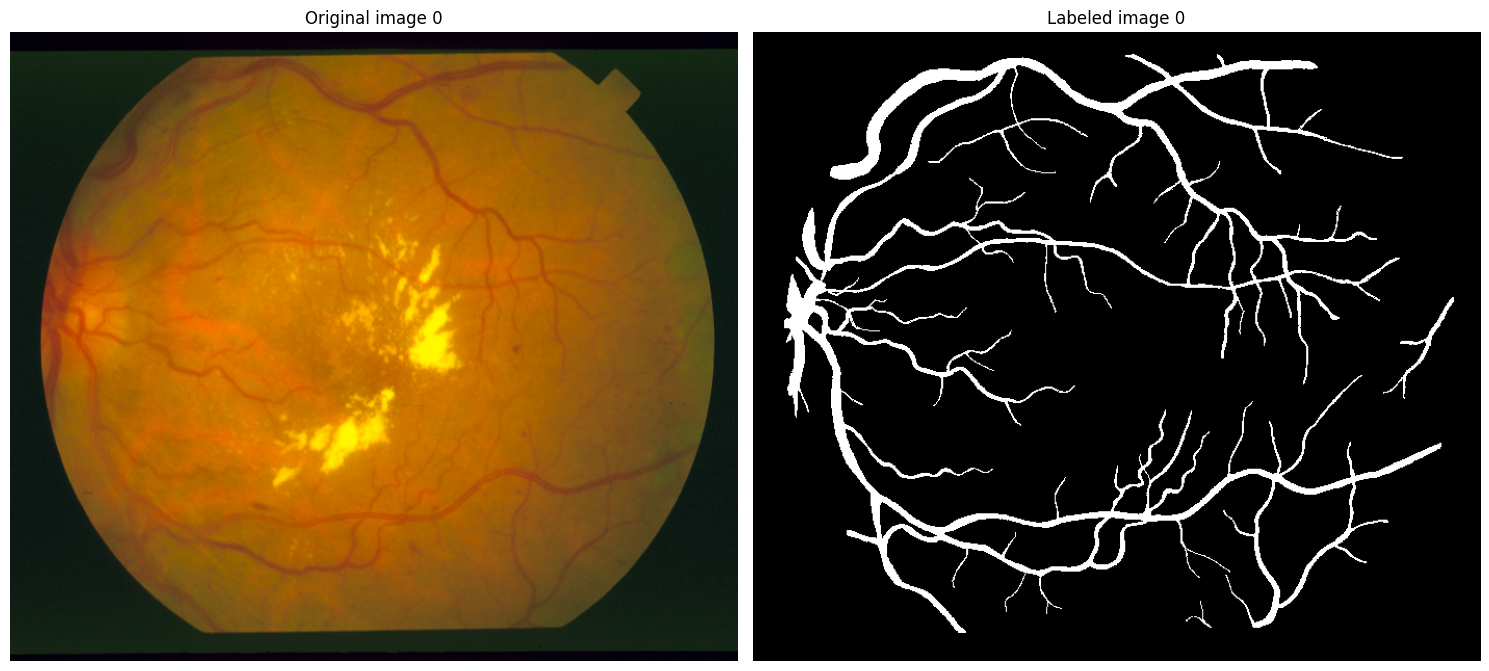

In [86]:
import cv2
import matplotlib.pyplot as plt
import glob

image_list = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in [cv2.imread(filename) for filename in sorted(glob.glob('data/*.ppm'))]]
image_labeled_list = [cv2.imread(filename, 1) for filename in sorted(glob.glob('data labeled/*.ppm'))]

# Display the original and labeled image
img_index = 0
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original image " + str(img_index))
ax1.imshow(image_list[img_index])
ax1.axis('off')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Labeled image " + str(img_index))
ax2.imshow(image_labeled_list[img_index], cmap='gray')
ax2.axis('off')

plt.tight_layout()
plt.show()

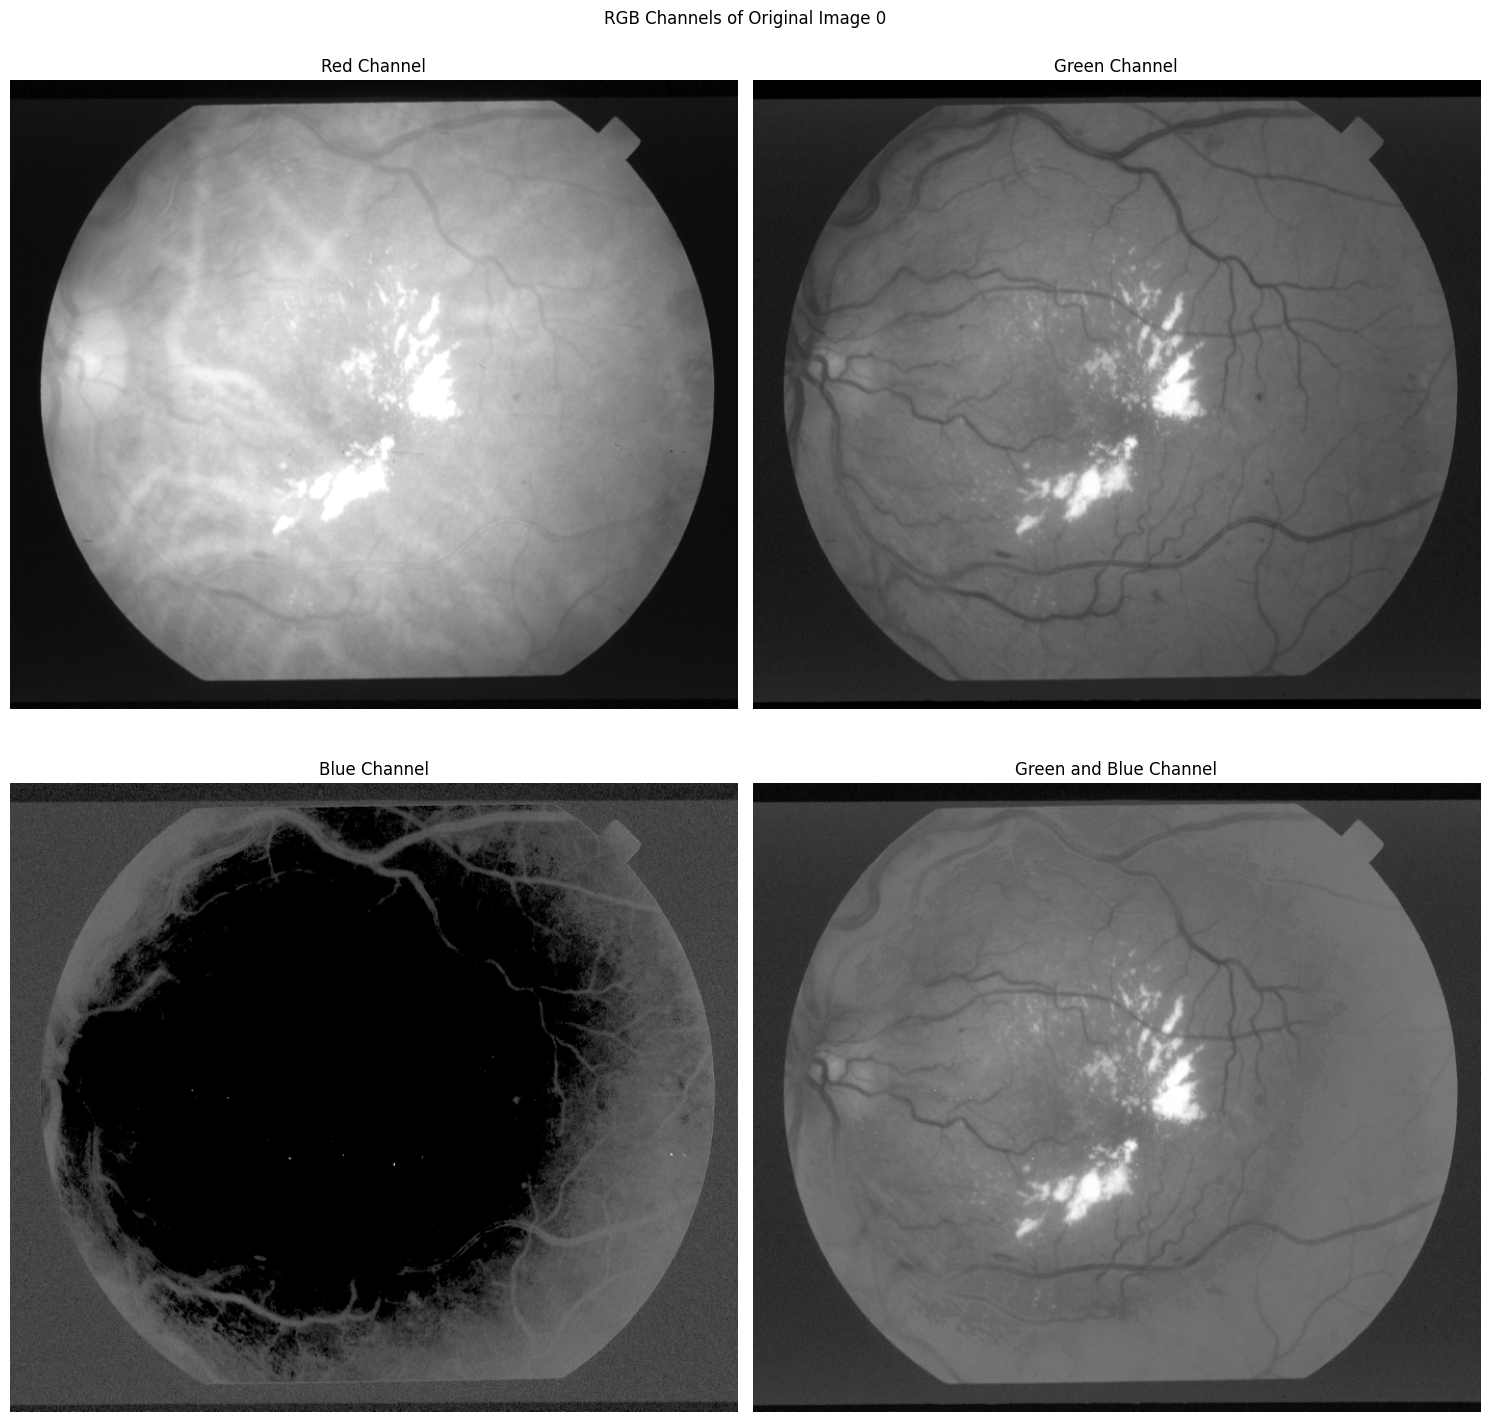

In [87]:
# Now, plot the three separate color channels
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("RGB Channels of Original Image " + str(img_index))

# Extracting the Red, Green, and Blue channels
red_channel = image_list[img_index][:, :, 0]
green_channel = image_list[img_index][:, :, 1]
blue_channel = image_list[img_index][:, :, 2]
green_blue_channel = (green_channel / 2 + blue_channel / 2).astype('uint8')
# Plot each channel
axs[0, 0].imshow(red_channel, cmap='gray')
axs[0, 0].set_title("Red Channel")
axs[0, 0].axis('off')

axs[0, 1].imshow(green_channel, cmap='gray')
axs[0, 1].set_title("Green Channel")
axs[0, 1].axis('off')

axs[1, 0].imshow(blue_channel, cmap='gray')
axs[1, 0].set_title("Blue Channel")
axs[1, 0].axis('off')

axs[1, 1].imshow(green_blue_channel, cmap='gray')
axs[1, 1].set_title("Green and Blue Channel")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

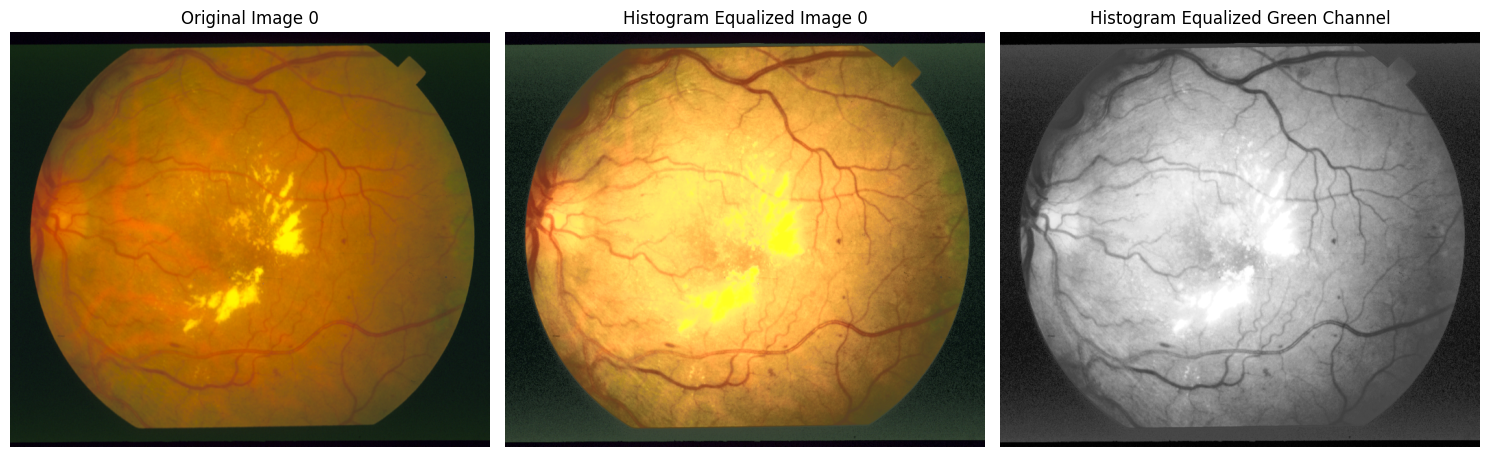

In [88]:
def equalize_histogram_rgb(image):
    # Convert the image from RGB to YCrCb color space
    ycrcb_img = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

    # Equalize the histogram of the Y channel (luminance)
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

    # Convert the image back to RGB color space
    equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2RGB)
    return equalized_img

normalized_image = equalize_histogram_rgb(image_list[img_index])
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the original image
axs[0].imshow(image_list[img_index])
axs[0].set_title("Original Image " + str(img_index))
axs[0].axis('off')

# Display the histogram-equalized image
axs[1].imshow(normalized_image)
axs[1].set_title("Histogram Equalized Image " + str(img_index))
axs[1].axis('off')

axs[2].imshow(normalized_image[:,:,1], cmap="gray")
axs[2].set_title("Histogram Equalized Green Channel")
axs[2].axis('off')

plt.tight_layout()
plt.show()

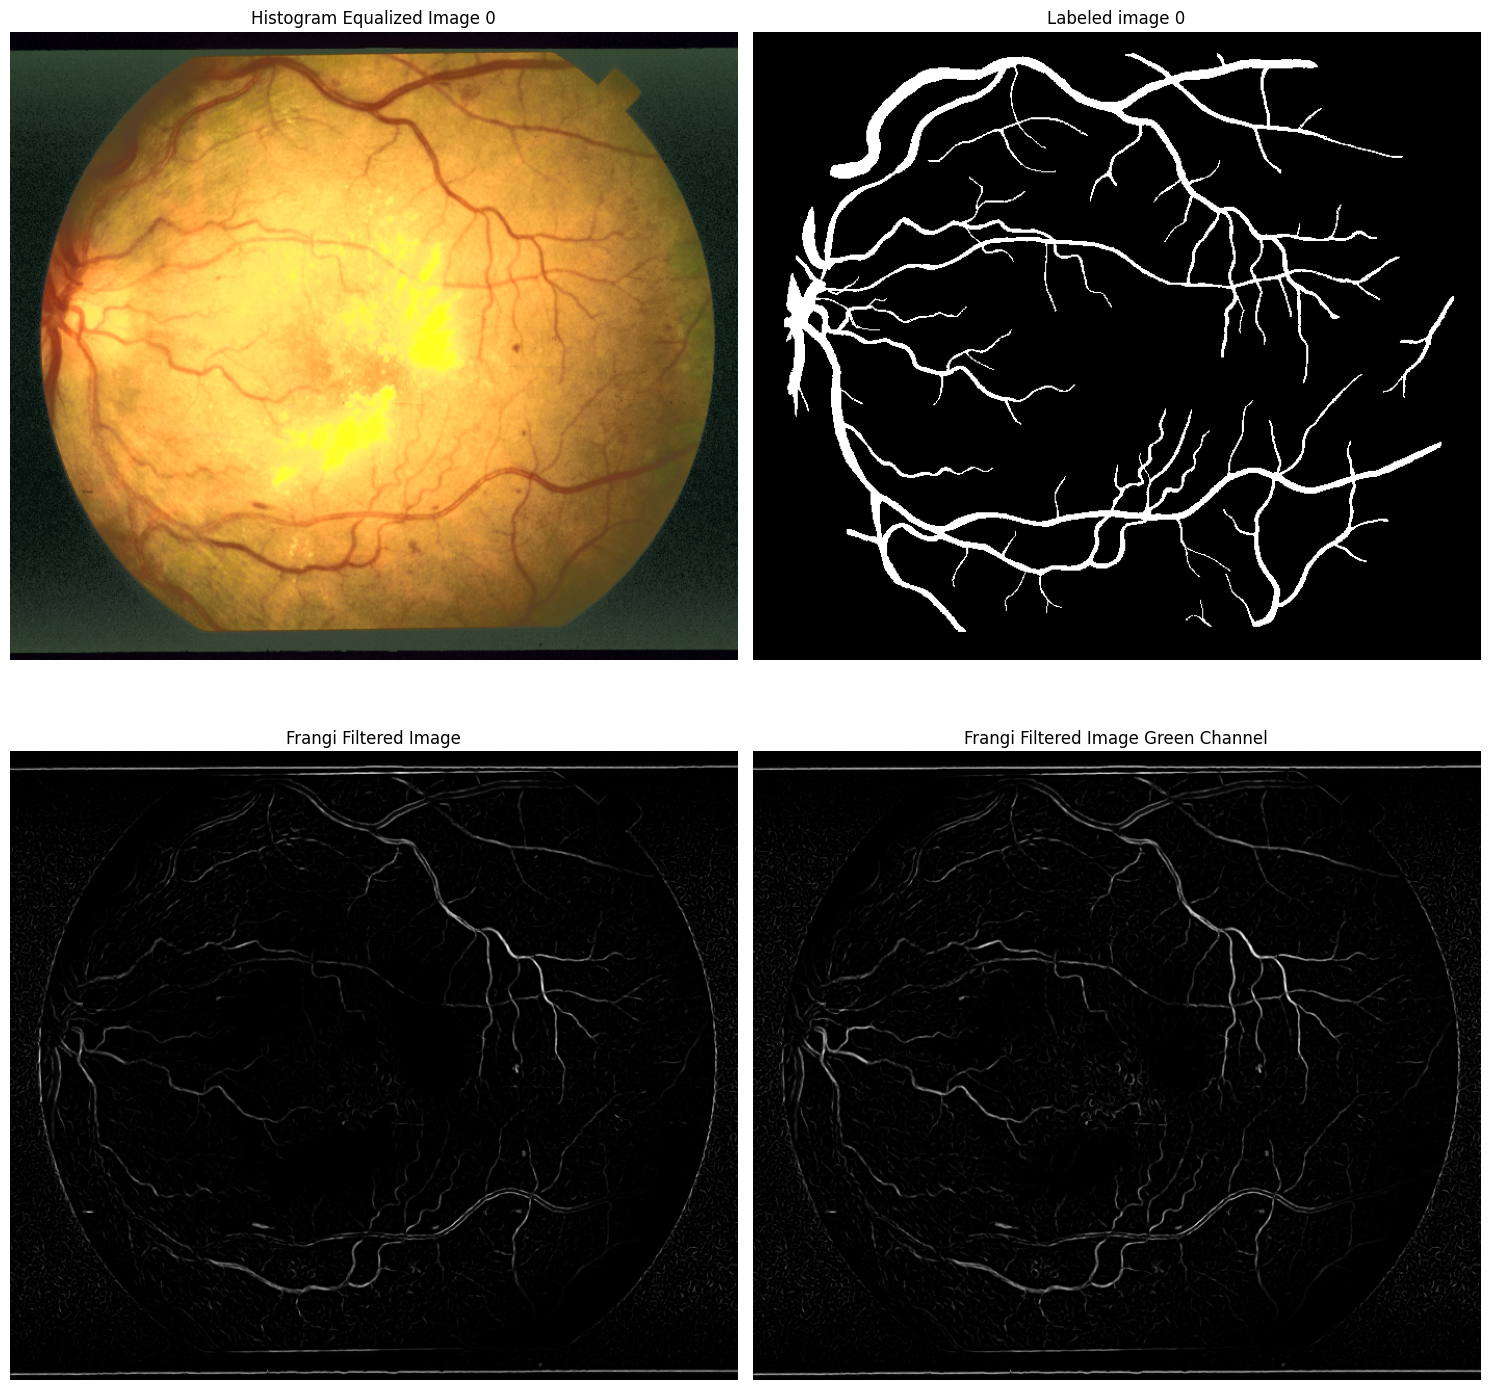

In [89]:
from skimage.filters import frangi

# Define a function to apply Frangi filter to an image
def apply_frangi_filter(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        image_gray = image

    # Apply Frangi filter
    frangi_image = frangi(image_gray)

    return frangi_image


# Apply Frangi filter to the selected image
frangi_result = apply_frangi_filter(normalized_image)
frangi_green_channel = apply_frangi_filter(normalized_image[:, :, 1])

# Plot the original image and the Frangi-filtered result
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Display the original image
axs[0, 0].imshow(normalized_image, cmap='gray' if len(normalized_image.shape) == 2 else None)
axs[0, 0].set_title("Histogram Equalized Image " + str(img_index))
axs[0, 0].axis('off')

# Display the Frangi-filtered image with only green channel
axs[0, 1].imshow(image_labeled_list[img_index], cmap='gray')
axs[0, 1].set_title("Labeled image " + str(img_index))
axs[0, 1].axis('off')


# Display the Frangi-filtered image
axs[1, 0].imshow(frangi_result, cmap='gray')
axs[1, 0].set_title("Frangi Filtered Image")
axs[1, 0].axis('off')

# Display the Frangi-filtered image with only green channel
axs[1, 1].imshow(frangi_green_channel, cmap='gray')
axs[1, 1].set_title("Frangi Filtered Image Green Channel")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

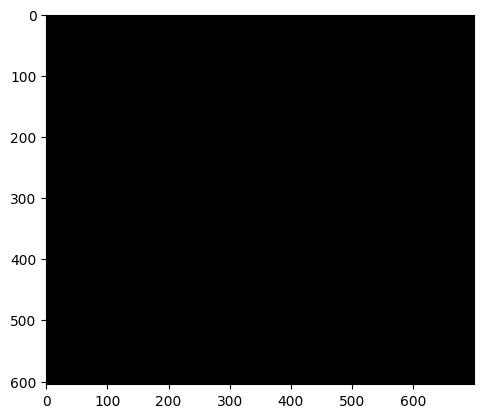